In [1]:
import numpy as np; import pandas as pd; import pyodbc; import datetime; import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn import metrics
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection
from sklearn.decomposition import PCA, FastICA,TruncatedSVD
%pylab inline 
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
from IPython.core.display import display,HTML
display(HTML("<style>.container{width:90% !important;}</style>"))

conn = pyodbc.connect(r'DRIVER={SQL Server Native Client 11.0};'r'SERVER=WIN-5G5AUOCEJPK;'r'DATABASE=Gold585;'r'Trusted_Connection=yes;')

Populating the interactive namespace from numpy and matplotlib


необходимые таблицы для прогноза - TempPurch3 и ##TempDate или (TempDate)

In [2]:
%%time
sql_query ="SELECT a.[PurchaseDate] \
      ,MONTH(a.[PurchaseDate]) Month \
      ,a.[PartnerID] \
      ,IIF(SEX='M',1,0) SEX \
      ,IIF(DATEDIFF(YEAR,[BirthDate],a.[PurchaseDate])> 100 , 0 , DATEDIFF(YEAR,[BirthDate],a.[PurchaseDate])) Age \
      ,[CityID] \
      ,DATEDIFF(DAY, [FirstVisit],a.[PurchaseDate])/30.0 LT  \
      ,DATEDIFF(DAY, t.LastDate,a.[PurchaseDate])/30.0 LastVisit_M  \
      ,[FirstVisit] \
      ,[QNTVisits] \
      ,[SumSMS] \
      ,[SumQuantity] \
      ,[SumSumma] \
      ,[AVGSumma] \
      ,[SUMM1] \
      ,[SUMM2] \
      ,[SUMM3] \
      ,[SUMM4] \
      ,[SUMM5] \
      ,[SUMM6] \
      ,[SUMM7] \
      ,[SUMM8] \
      ,[SUMM9] \
      ,[SUMM10] \
      ,[SUMM11] \
      ,[SUMM12] \
      ,[SUMP1k] \
      ,[SUMP3k] \
      ,[SUMP6k] \
      ,[SUMP12k] \
      ,[SUMP50k] \
      ,[SUMKolco] \
      ,[SUMSERGI] \
      ,[SUMPODVES] \
      ,[SUMCEP] \
      ,[SUMBRASLET] \
      ,[SUMKOLE] \
      ,[SUMCheap] \
      ,[SUMExpensive] \
      ,[SUMPremium] \
      ,[SUMMiddle] \
      ,[SUMZoloto] \
      ,[SUMSerebro] \
      ,[SUMColorBlack] \
      ,[SUMColorRed] \
      ,[SUMColorYellow] \
      ,[SUMColorWhite] \
      ,[SUMColor3] \
      ,[SUMColor2] \
      ,[SUMGroupBaza] \
      ,[SUMGroupClassic] \
      ,[SUMGroupModa] \
      ,[SUMGroupModul] \
      ,[SUMGroupSouvenir] \
      ,[SUMGroupTrend] \
      ,IIF(LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID,0,1) LastPurchase \
      ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMZoloto],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMZoloto] IS NULL,0,1)), \
      1,0) NextGold \
      ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMKolco],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMKolco] IS NULL,0,1)), \
      1,0) NextColco \
      ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMSERGI],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMSERGI] IS NULL,0,1)), \
      1,0) NextSERGI \
      ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMPODVES],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMPODVES] IS NULL,0,1)), \
	  1,0) NextPODVES \
	  ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMCEP],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMCEP] IS NULL,0,1)), \
	  1,0) NextCEP \
	  ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMBRASLET],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMBRASLET] IS NULL,0,1)), \
	  1,0) NextBRASLET \
	  ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMCheap],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMCheap] IS NULL,0,1)), \
	  1,0) NextCheap \
	  ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMExpensive],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMExpensive] IS NULL,0,1)), \
	  1,0) NextExpensive \
	  ,IIF((LEAD(a.PartnerID,1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) = a.PartnerID) and (LEAD([SUMMiddle],1,NULL) over (ORDER BY a.PartnerID,a.[PurchaseDate]) > IIF([SUMMiddle] IS NULL,0,1)), \
	  1,0) NextMiddle \
  FROM [Gold585].[dbo].[TempPurch3] a left join [Gold585].[dbo].TempDate2 t on a.PartnerID = t.PartnerID and a.PurchaseDate = t.PurchaseDate \
  order by PartnerID, PurchaseDate"

df = pd.read_sql(sql_query,conn)
df.head()

Wall time: 8min 58s


In [3]:
pred = df[df['LastPurchase']==1].fillna(0).reset_index(drop=True)
predId = pd.DataFrame(df['PartnerID'][df['LastPurchase']==1],columns=['PartnerID']).reset_index(drop=True)
data = df[df['LastPurchase']!=1].fillna(0).reset_index(drop=True)
pred.head()

,PurchaseDate,Month,PartnerID,SEX,Age,CityID,LT,LastVisit_M,FirstVisit,QNTVisits,...,LastPurchase,NextGold,NextColco,NextSERGI,NextPODVES,NextCEP,NextBRASLET,NextCheap,NextExpensive,NextMiddle
0,2016-01-24,1,10,0,20,105,0.000000,0.000000,2016-01-24,1,...,1,0,0,0,0,0,0,0,0,0
1,2016-01-24,1,100,1,28,36,0.000000,0.000000,2016-01-24,1,...,1,0,0,0,0,0,0,0,0,0
2,2018-09-13,9,1000,0,0,30,32.066666,8.233333,2016-01-25,7,...,1,0,0,0,0,0,0,0,0,0
3,2017-03-04,3,1000037,0,25,47,15.833333,15.833333,2015-11-15,2,...,1,0,0,0,0,0,0,0,0,0
4,2016-01-23,1,1000038,1,0,20,0.000000,0.000000,2016-01-23,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(2280623, 65)

In [5]:
print(data['NextColco'].value_counts())
print(data['NextSERGI'].value_counts())
print(data['NextPODVES'].value_counts())
print(data['NextCEP'].value_counts())
print(data['NextBRASLET'].value_counts())

0    1292632
1     987991
Name: NextColco, dtype: int64
0    1519731
1     760892
Name: NextSERGI, dtype: int64
0    1744152
1     536471
Name: NextPODVES, dtype: int64
0    1778451
1     502172
Name: NextCEP, dtype: int64
0    1998300
1     282323
Name: NextBRASLET, dtype: int64


In [6]:
data.columns

Index(['PurchaseDate', 'Month', 'PartnerID', 'SEX', 'Age', 'CityID', 'LT',
       'LastVisit_M', 'FirstVisit', 'QNTVisits', 'SumSMS', 'SumQuantity',
       'SumSumma', 'AVGSumma', 'SUMM1', 'SUMM2', 'SUMM3', 'SUMM4', 'SUMM5',
       'SUMM6', 'SUMM7', 'SUMM8', 'SUMM9', 'SUMM10', 'SUMM11', 'SUMM12',
       'SUMP1k', 'SUMP3k', 'SUMP6k', 'SUMP12k', 'SUMP50k', 'SUMKolco',
       'SUMSERGI', 'SUMPODVES', 'SUMCEP', 'SUMBRASLET', 'SUMKOLE', 'SUMCheap',
       'SUMExpensive', 'SUMPremium', 'SUMMiddle', 'SUMZoloto', 'SUMSerebro',
       'SUMColorBlack', 'SUMColorRed', 'SUMColorYellow', 'SUMColorWhite',
       'SUMColor3', 'SUMColor2', 'SUMGroupBaza', 'SUMGroupClassic',
       'SUMGroupModa', 'SUMGroupModul', 'SUMGroupSouvenir', 'SUMGroupTrend',
       'LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],
      dtype='object')

In [7]:
#dataColco1 = data[data['NextColco']==1] #.sample(300000)
#dataSERGI1 = data[data['NextSERGI']==1]
#dataPODVES1 = data[data['NextPODVES']==1]
#dataCEP1 = data[data['NextCEP']==1]
#dataBRASLET1 = data[data['NextBRASLET']==1]

#dataColco0 = data[data['NextColco']!=1]
#dataSERGI0 = data[data['NextSERGI']!=1].sample(800000)
#dataPODVES0 = data[data['NextPODVES']!=1].sample(550000)
#dataCEP0 = data[data['NextCEP']!=1].sample(500000)
#dataBRASLET0 = data[data['NextBRASLET']!=1].sample(300000)

X = data
#X = pd.concat([dataColco1,dataColco0],axis=0,ignore_index=True)
#XSERGI = pd.concat([dataSERGI1,dataSERGI0],axis=0,ignore_index=True)
#XPODVES = pd.concat([dataPODVES1,dataPODVES0],axis=0,ignore_index=True)
#XCEP = pd.concat([dataCEP1,dataCEP0],axis=0,ignore_index=True)
#XBRASLET = pd.concat([dataBRASLET1,dataBRASLET0],axis=0,ignore_index=True)

X.head()

,PurchaseDate,Month,PartnerID,SEX,Age,CityID,LT,LastVisit_M,FirstVisit,QNTVisits,...,LastPurchase,NextGold,NextColco,NextSERGI,NextPODVES,NextCEP,NextBRASLET,NextCheap,NextExpensive,NextMiddle
0,2016-01-25,1,1000,0,0,30,0.000000,0.000000,2016-01-25,1,...,0,0,0,0,0,0,0,0,0,1
1,2016-12-11,12,1000,0,0,30,10.700000,10.700000,2016-01-25,2,...,0,1,0,0,1,0,0,1,0,1
2,2017-01-20,1,1000,0,0,30,12.033333,1.333333,2016-01-25,3,...,0,1,0,0,1,0,0,1,0,1
3,2017-02-13,2,1000,0,0,30,12.833333,0.800000,2016-01-25,4,...,0,1,0,0,1,1,0,1,1,1
4,2017-07-10,7,1000,0,0,30,17.733333,4.900000,2016-01-25,5,...,0,1,0,0,1,1,0,1,1,1


In [8]:
X.shape

(2280623, 65)

In [9]:
X.columns

Index(['PurchaseDate', 'Month', 'PartnerID', 'SEX', 'Age', 'CityID', 'LT',
       'LastVisit_M', 'FirstVisit', 'QNTVisits', 'SumSMS', 'SumQuantity',
       'SumSumma', 'AVGSumma', 'SUMM1', 'SUMM2', 'SUMM3', 'SUMM4', 'SUMM5',
       'SUMM6', 'SUMM7', 'SUMM8', 'SUMM9', 'SUMM10', 'SUMM11', 'SUMM12',
       'SUMP1k', 'SUMP3k', 'SUMP6k', 'SUMP12k', 'SUMP50k', 'SUMKolco',
       'SUMSERGI', 'SUMPODVES', 'SUMCEP', 'SUMBRASLET', 'SUMKOLE', 'SUMCheap',
       'SUMExpensive', 'SUMPremium', 'SUMMiddle', 'SUMZoloto', 'SUMSerebro',
       'SUMColorBlack', 'SUMColorRed', 'SUMColorYellow', 'SUMColorWhite',
       'SUMColor3', 'SUMColor2', 'SUMGroupBaza', 'SUMGroupClassic',
       'SUMGroupModa', 'SUMGroupModul', 'SUMGroupSouvenir', 'SUMGroupTrend',
       'LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],
      dtype='object')

In [10]:
%%time
#a = X['QNTVisits'].quantile(0.99)
#b = X['SumSumma'].quantile(0.99)
#X = X[X['QNTVisits']<a].reset_index(drop=True)
#X = X[X['SumSumma']<b].reset_index(drop=True)

Wall time: 0 ns


In [11]:
y_Colco=X['NextColco']
y_SERGI=X['NextSERGI']
y_PODVES=X['NextPODVES']
y_CEP=X['NextCEP']
y_BRASLET=X['NextBRASLET']

#all_y_Colco = all_data['NextColco']
#all_y_Sergi = all_data['NextSERGI']
#all_y_PODVES = all_data['NextPODVES']
#all_y_CEP = all_data['NextCEP']
#all_y_BRASLET = all_data['NextBRASLET']

X.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)
#XSERGI.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
#       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)
#XPODVES.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
#       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)
#XCEP.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
#       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)
#XBRASLET.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
#       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)

#all_data.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
#       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)

pred.drop(['PurchaseDate','FirstVisit','LastPurchase', 'NextGold', 'NextColco', 'NextSERGI', 'NextPODVES',
       'NextCEP', 'NextBRASLET', 'NextCheap', 'NextExpensive', 'NextMiddle'],axis=1,inplace=True)

In [12]:
print(X.shape)
print(len(y_Colco))
#print(all_data.shape)
#print(len(all_y_Colco))
print(pred.shape)

(2280623, 53)
2280623
(2648950, 53)


In [13]:
X.head()

,Month,PartnerID,SEX,Age,CityID,LT,LastVisit_M,QNTVisits,SumSMS,SumQuantity,...,SUMColorYellow,SUMColorWhite,SUMColor3,SUMColor2,SUMGroupBaza,SUMGroupClassic,SUMGroupModa,SUMGroupModul,SUMGroupSouvenir,SUMGroupTrend
0,1,1000,0,0,30,0.000000,0.000000,1,0,2,...,0,2,0,0,0,2,0,0,0,0
1,12,1000,0,0,30,10.700000,10.700000,2,0,3,...,0,3,0,0,0,2,0,0,1,0
2,1,1000,0,0,30,12.033333,1.333333,3,0,6,...,0,3,0,0,0,3,2,0,1,0
3,2,1000,0,0,30,12.833333,0.800000,4,0,9,...,0,5,0,1,2,3,3,0,1,0
4,7,1000,0,0,30,17.733333,4.900000,5,0,10,...,0,6,0,1,3,3,3,0,1,0


In [14]:
%%time
for_norm = pd.concat((X,pred),axis=0,ignore_index=True)

#for_norm_s = pd.concat((XSERGI,pred),axis=0,ignore_index=True)
#for_norm_p = pd.concat((XPODVES,pred),axis=0,ignore_index=True)
#for_norm_c = pd.concat((XCEP,pred),axis=0,ignore_index=True)
#for_norm_b = pd.concat((XBRASLET,pred),axis=0,ignore_index=True)

Wall time: 4.7 s


In [15]:
for_norm.columns

Index(['Month', 'PartnerID', 'SEX', 'Age', 'CityID', 'LT', 'LastVisit_M',
       'QNTVisits', 'SumSMS', 'SumQuantity', 'SumSumma', 'AVGSumma', 'SUMM1',
       'SUMM2', 'SUMM3', 'SUMM4', 'SUMM5', 'SUMM6', 'SUMM7', 'SUMM8', 'SUMM9',
       'SUMM10', 'SUMM11', 'SUMM12', 'SUMP1k', 'SUMP3k', 'SUMP6k', 'SUMP12k',
       'SUMP50k', 'SUMKolco', 'SUMSERGI', 'SUMPODVES', 'SUMCEP', 'SUMBRASLET',
       'SUMKOLE', 'SUMCheap', 'SUMExpensive', 'SUMPremium', 'SUMMiddle',
       'SUMZoloto', 'SUMSerebro', 'SUMColorBlack', 'SUMColorRed',
       'SUMColorYellow', 'SUMColorWhite', 'SUMColor3', 'SUMColor2',
       'SUMGroupBaza', 'SUMGroupClassic', 'SUMGroupModa', 'SUMGroupModul',
       'SUMGroupSouvenir', 'SUMGroupTrend'],
      dtype='object')

In [16]:
%%time
for_norm = pd.get_dummies(for_norm, columns = ['CityID'],drop_first=True)

#for_norm_s = pd.get_dummies(for_norm_s, columns = ['SEX','CityID'],drop_first=True)
#for_norm_p = pd.get_dummies(for_norm_p, columns = ['SEX','CityID'],drop_first=True)
#for_norm_c = pd.get_dummies(for_norm_c, columns = ['SEX','CityID'],drop_first=True)
#for_norm_b = pd.get_dummies(for_norm_b, columns = ['SEX','CityID'],drop_first=True)

#all_data = pd.get_dummies(all_data, columns = ['SEX','CityID'],drop_first=True)

Wall time: 18.8 s


In [17]:
print(for_norm.shape)
#print(all_data.shape)

(4929573, 172)


In [18]:
for_norm.head()

,Month,PartnerID,SEX,Age,LT,LastVisit_M,QNTVisits,SumSMS,SumQuantity,SumSumma,...,CityID_119,CityID_120,CityID_121,CityID_122,CityID_123,CityID_124,CityID_125,CityID_126,CityID_127,CityID_128
0,1,1000,0,0,0.000000,0.000000,1,0,2,2237.0,...,0,0,0,0,0,0,0,0,0,0
1,12,1000,0,0,10.700000,10.700000,2,0,3,2580.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1000,0,0,12.033333,1.333333,3,0,6,4719.0,...,0,0,0,0,0,0,0,0,0,0
3,2,1000,0,0,12.833333,0.800000,4,0,9,20298.0,...,0,0,0,0,0,0,0,0,0,0
4,7,1000,0,0,17.733333,4.900000,5,0,10,21369.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
%%time
scaler = StandardScaler()
scaler.fit(for_norm)
for_norm_2 = scaler.transform(for_norm)

#scaler = StandardScaler()
#scaler.fit(for_norm)
#for_norm_s = scaler.transform(for_norm)
#scaler = StandardScaler()
#scaler.fit(for_norm)
#for_norm_s = scaler.transform(for_norm)
#scaler = StandardScaler()
#scaler.fit(for_norm)
#for_norm_s = scaler.transform(for_norm)
#scaler = StandardScaler()
#scaler.fit(for_norm)
#for_norm_s = scaler.transform(for_norm)

#all_data_2 = scaler.transform(all_data)

Wall time: 2min 41s


In [20]:
for_norm_2= pd.DataFrame(for_norm_2,columns=for_norm.columns)
#all_data = pd.DataFrame(all_data_s,columns=all_data.columns)

In [21]:
X = for_norm_2[:X.shape[0]]
pred = for_norm_2[X.shape[0]:]
print(X.shape)
print(y_Colco.shape)
#print(all_data.shape)
#print(len(all_y_Colco))
print(pred.shape)

(2280623, 172)
(2280623,)
(2648950, 172)


In [22]:
pd.DataFrame(X).head()

,Month,PartnerID,SEX,Age,LT,LastVisit_M,QNTVisits,SumSMS,SumQuantity,SumSumma,...,CityID_119,CityID_120,CityID_121,CityID_122,CityID_123,CityID_124,CityID_125,CityID_126,CityID_127,CityID_128
0,-1.644437,-1.76534,-0.655296,-2.117742,-0.542748,-0.444020,-0.084015,-0.197609,-0.064963,-0.085990,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
1,1.410045,-1.76534,-0.655296,-2.117742,0.486549,1.292093,-0.048030,-0.197609,-0.045480,-0.084712,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
2,-1.644437,-1.76534,-0.655296,-2.117742,0.614810,-0.227682,-0.012045,-0.197609,0.012967,-0.076741,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
3,-1.366757,-1.76534,-0.655296,-2.117742,0.691767,-0.314217,0.023941,-0.197609,0.071415,-0.018684,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
4,0.021644,-1.76534,-0.655296,-2.117742,1.163127,0.351023,0.059926,-0.197609,0.090898,-0.014693,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808


In [23]:
pred.head()

,Month,PartnerID,SEX,Age,LT,LastVisit_M,QNTVisits,SumSMS,SumQuantity,SumSumma,...,CityID_119,CityID_120,CityID_121,CityID_122,CityID_123,CityID_124,CityID_125,CityID_126,CityID_127,CityID_128
2280623,-1.644437,-1.765919,-0.655296,-0.903040,-0.542748,-0.444020,-0.084015,-0.197609,-0.084446,-0.092568,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
2280624,-1.644437,-1.765866,1.526028,-0.417159,-0.542748,-0.444020,-0.084015,-0.197609,-0.084446,-0.040664,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
2280625,0.577004,-1.765340,-0.655296,-2.117742,2.541936,0.891868,0.131897,-0.197609,0.149345,-0.001755,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
2280626,-1.089076,-1.181390,-0.655296,-0.599365,0.980355,2.124995,-0.048030,-0.197609,-0.064963,-0.060191,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808
2280627,-1.644437,-1.181390,1.526028,-2.117742,-0.542748,-0.444020,-0.084015,-0.197609,-0.084446,-0.072683,...,-0.024216,-0.06806,-0.113011,-0.142109,-0.100082,-0.080599,-0.024052,-0.015539,-0.027056,-0.082808


In [24]:
#Кольцо

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_Colco, test_size=0.25, random_state=42,stratify=y_Colco,shuffle =True)

In [26]:
%%time
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit a CART model to the data
ExTC1 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, # n_estimators=700,
           verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'class_weight':['balanced'],
   # 'max_depth' : [2,200,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = GridSearchCV(estimator=ExTC1, param_grid=param_grid, cv= 5)
#model.fit(X_train, y_train)
ExTC1.fit(X_train, y_train)
#print(model)
# make predictions
expected = y_test
#predicted = model.predict(X_test)
predicted = ExTC1.predict_proba(X_test)
labels =  ExTC1.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, labels))
print(metrics.confusion_matrix(expected, labels))
print(roc_auc_score(expected, labels))
print(roc_auc_score(expected, predicted[:,1]))
#ExtraTreesClassifier

             precision    recall  f1-score   support

          0       0.84      0.94      0.88    323158
          1       0.91      0.76      0.83    246998

avg / total       0.87      0.86      0.86    570156

[[303666  19492]
 [ 59710 187288]]
0.8489699538417174
0.9274293420791753
Wall time: 4min 5s


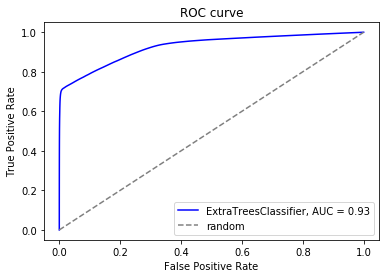

In [27]:
preds = predicted[:,1]
fpr, tpr, treshold = metrics.roc_curve(expected, preds)
roc_auc = metrics.auc(fpr, tpr)
pylab.title('ROC curve')
pylab.plot(fpr, tpr,'b', label = 'ExtraTreesClassifier, AUC = %0.2f' % roc_auc)
pylab.plot([0, 1],[0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.legend(loc = 'lower right')

In [50]:
predict = ExTC.predict_proba(pred)[:,1]
predictedID = pd.concat([predId,pd.DataFrame(predict,columns=['Colco'])],axis=1,ignore_index=False)

In [51]:
predictedID.head()

,PartnerID,Colco
0,10,0.29
1,100,0.72
2,1000,0.80
3,1000037,0.34
4,1000038,0.04


In [32]:
#Серьги

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_SERGI, test_size=0.25, random_state=42,stratify=y_Colco,shuffle =True)

In [29]:
%%time
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit a CART model to the data
ExTC2 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, # n_estimators=700,
           verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'class_weight':['balanced'],
   # 'max_depth' : [2,200,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = GridSearchCV(estimator=ExTC, param_grid=param_grid, cv= 5)
#model.fit(X_train, y_train)
ExTC2.fit(X_train, y_train)
#print(model)
# make predictions
expected = y_test
#predicted = model.predict(X_test)
predicted = ExTC2.predict_proba(X_test)
labels =  ExTC2.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, labels))
print(metrics.confusion_matrix(expected, labels))
print(roc_auc_score(expected, labels))
print(roc_auc_score(expected, predicted[:,1]))
#ExtraTreesClassifier

             precision    recall  f1-score   support

          0       0.87      0.97      0.92    379408
          1       0.92      0.72      0.81    190748

avg / total       0.89      0.88      0.88    570156

[[367499  11909]
 [ 53907 136841]]
0.8430015794087001
0.9348405480031453
Wall time: 4min 4s


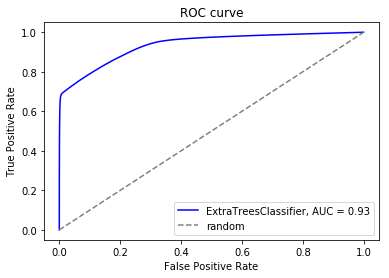

In [30]:
preds = predicted[:,1]
fpr, tpr, treshold = metrics.roc_curve(expected, preds)
roc_auc = metrics.auc(fpr, tpr)
pylab.title('ROC curve')
pylab.plot(fpr, tpr,'b', label = 'ExtraTreesClassifier, AUC = %0.2f' % roc_auc)
pylab.plot([0, 1],[0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.legend(loc = 'lower right')

In [54]:
predict = ExTC.predict_proba(pred)[:,1]
predictedID = pd.concat([predictedID,pd.DataFrame(predict,columns=['Sergi'])],axis=1,ignore_index=False)
predictedID.head()

,PartnerID,Colco,Sergi
0,10,0.29,0.06
1,100,0.72,0.01
2,1000,0.80,0.59
3,1000037,0.34,0.32
4,1000038,0.04,0.22


In [36]:
#Подвес


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_PODVES, test_size=0.25, random_state=42,stratify=y_Colco,shuffle =True)

In [60]:
%%time
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit a CART model to the data
ExTC3 = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, # n_estimators=700,
           verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'class_weight':['balanced'],
   # 'max_depth' : [2,200,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = GridSearchCV(estimator=ExTC, param_grid=param_grid, cv= 5)
#model.fit(X_train, y_train)
ExTC3.fit(X_train, y_train)
#print(model)
# make predictions
expected = y_test
#predicted = model.predict(X_test)
predicted = ExTC.predict_proba(X_test)
labels =  ExTC.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, labels))
print(metrics.confusion_matrix(expected, labels))
print(roc_auc_score(expected, labels))
print(roc_auc_score(expected, predicted[:,1]))
#ExtraTreesClassifier

             precision    recall  f1-score   support

          0       0.93      0.99      0.96    435443
          1       0.97      0.74      0.84    134713

avg / total       0.94      0.93      0.93    570156

[[432060   3383]
 [ 34897  99816]]
0.8665919447160626
0.9458108990671579
Wall time: 4min 24s


In [61]:
predict = ExTC.predict_proba(pred)[:,1]
predictedID = pd.concat([predictedID,pd.DataFrame(predict,columns=['Podves'])],axis=1,ignore_index=False)
predictedID.head()

,PartnerID,Colco,Sergi,Podves
0,10,0.29,0.06,0.32
1,100,0.72,0.01,0.00
2,1000,0.80,0.59,0.84
3,1000037,0.34,0.32,0.01
4,1000038,0.04,0.22,0.01


In [62]:
#Цепь

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_CEP, test_size=0.25, random_state=42,stratify=y_Colco,shuffle =True)

In [64]:
%%time
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit a CART model to the data
ExTC = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, # n_estimators=700,
           verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'class_weight':['balanced'],
   # 'max_depth' : [2,200,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = GridSearchCV(estimator=ExTC, param_grid=param_grid, cv= 5)
#model.fit(X_train, y_train)
ExTC.fit(X_train, y_train)
#print(model)
# make predictions
expected = y_test
#predicted = model.predict(X_test)
predicted = ExTC.predict_proba(X_test)
labels =  ExTC.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, labels))
print(metrics.confusion_matrix(expected, labels))
print(roc_auc_score(expected, labels))
print(roc_auc_score(expected, predicted[:,1]))
#ExtraTreesClassifier

             precision    recall  f1-score   support

          0       0.93      0.99      0.96    444691
          1       0.97      0.72      0.82    125465

avg / total       0.93      0.93      0.93    570156

[[441453   3238]
 [ 35710  89755]]
0.8540486651440665
0.9479435916906684
Wall time: 4min 26s


In [65]:
predict = ExTC.predict_proba(pred)[:,1]
predictedID = pd.concat([predictedID,pd.DataFrame(predict,columns=['Cep'])],axis=1,ignore_index=False)
predictedID.head()

,PartnerID,Colco,Sergi,Podves,Cep
0,10,0.29,0.06,0.32,0.00
1,100,0.72,0.01,0.00,0.00
2,1000,0.80,0.59,0.84,0.84
3,1000037,0.34,0.32,0.01,0.00
4,1000038,0.04,0.22,0.01,0.00


In [66]:
#Браслет

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y_BRASLET, test_size=0.25, random_state=42,stratify=y_Colco,shuffle =True)

In [68]:
%%time
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit a CART model to the data
ExTC = ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42, # n_estimators=700,
           verbose=0, warm_start=False)
param_grid = { 
    'n_estimators': [200, 700],
    'class_weight':['balanced'],
   # 'max_depth' : [2,200,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}
model = GridSearchCV(estimator=ExTC, param_grid=param_grid, cv= 5)
#model.fit(X_train, y_train)
ExTC.fit(X_train, y_train)
#print(model)
# make predictions
expected = y_test
#predicted = model.predict(X_test)
predicted = ExTC.predict_proba(X_test)
labels =  ExTC.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, labels))
print(metrics.confusion_matrix(expected, labels))
print(roc_auc_score(expected, labels))
print(roc_auc_score(expected, predicted[:,1]))
#ExtraTreesClassifier

             precision    recall  f1-score   support

          0       0.97      1.00      0.98    499128
          1       0.98      0.75      0.85     71028

avg / total       0.97      0.97      0.97    570156

[[498115   1013]
 [ 17460  53568]]
0.8760759550261333
0.9593056306135277
Wall time: 3min 40s


In [69]:
predict = ExTC.predict_proba(pred)[:,1]
predictedID = pd.concat([predictedID,pd.DataFrame(predict,columns=['Braslet'])],axis=1,ignore_index=False)
predictedID.head()

,PartnerID,Colco,Sergi,Podves,Cep,Braslet
0,10,0.29,0.06,0.32,0.00,0.00
1,100,0.72,0.01,0.00,0.00,0.00
2,1000,0.80,0.59,0.84,0.84,0.22
3,1000037,0.34,0.32,0.01,0.00,0.00
4,1000038,0.04,0.22,0.01,0.00,0.00


In [70]:
predictedID.to_csv('wear_type_pred.csv')

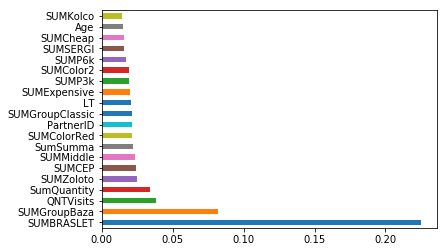

In [45]:
feat_importances = pd.Series(ExTC.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [263]:
predict = ExTC.predict(pred)

In [282]:
predictedID_metall = pd.concat([predId,pd.DataFrame(predict,columns=['Zoloto'])],axis=1,ignore_index=False)

In [283]:
predictedID_metall.head()

,PartnerID,Zoloto
0,10,0
1,100,1
2,1000,1
3,1000037,1
4,1000038,1


In [284]:
predictedID_metall['Zoloto'].value_counts()

1    2058236
0     590714
Name: Zoloto, dtype: int64